<h1>Import frameworks</h1>
<p>numpy - numerical calculations</p>
<p>scipy - optimazation and equations</p>
<p>pandas - data analys</p>
<p>matplotlib - graphs and plotting</p>

In [26]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot

<h1>Lamda functions</h1>

In [27]:
ratio = lambda children, elderly, labor: 100 * (children + elderly) / labor

<h1>Load population dataFrame</h1>

63.193680154207755
age   (-1, 14]  (14, 64]  (64, 110]      ratio
1860   1292962   2365121     201645  63.193680
1861   1318714   2385678     208106  63.999417
1862   1338720   2405974     212807  64.486441
1863   1362024   2431967     217661  64.955034
1864   1380235   2460997     219574  65.006540
1292962
Index(['1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868',
       '1869',
       ...
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object', length=163)


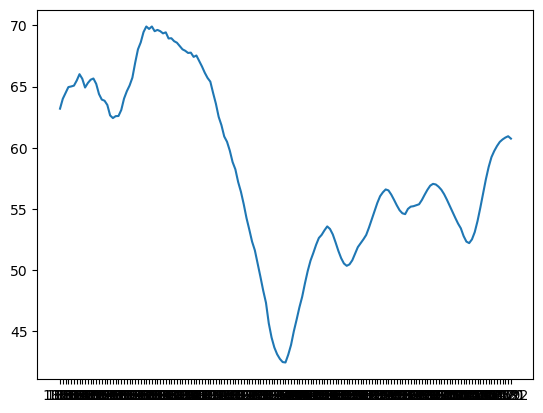

In [113]:
population = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv',  sep=',',)
populationNoSex = population.drop(columns=['sex'])

populationNoSex.at[220,'age'] = 110
populationNoSex.at[221,'age'] = 110
populationNoSex['age'] = pd.to_numeric(populationNoSex['age'], errors='coerce', downcast='float')



#print(populationNoSex.iloc[:,0])
classes = populationNoSex.groupby(pd.cut(populationNoSex['age'], [-1, 14, 64, 110])).sum()
classes = classes.drop(columns=['age'])
classesT = classes.transpose()
classesT['ratio'] = classesT.apply(lambda row: ratio(row.iat[0], row.iat[2], row.iat[1]), axis=1) 
#ratioDF = classes.apply(ratio())

#classses = classes.apply(ratio())
print(ratio(1292962, 201645, 2365121))
print(classesT.head())
print(classesT.iat[0,0])
print(classesT.index)


pyplot.plot(classesT.index.values, classesT['ratio'])
pyplot.show()

#print(populationByAge.index)
#print(f"Heads:  {populationByAge.head()}")

<h1>Create new dataset</h1>

In [47]:
print(popGroupsByAge['age'])
#classes = popGroupsByAge.groupby(pd.cut(x=popGroupsByAge['age'], bins= [0, 14, 64, 110])).sum()





KeyError: 'age'